<a href="https://colab.research.google.com/github/elsaimo/4106_Final_project/blob/main/MohamedFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/sample_data/heart_disease_uci.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
#remove irrelevant columns
df = df.drop(columns=['id','dataset'])

#remove columns with null values
df.isnull().values.any()
df = df.dropna()

df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
#encode Male = 0 & Female = 1
df['sex'] = df['sex'].map({'Female': 1, 'Male': 0})

#encode cp, restecg, slope, thal
onehot_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'thal'])
df = onehot_encoder.fit_transform(df)

#True = 1, False = 0
df[['fbs', 'exang']] = df[['fbs', 'exang']].astype(int)

#scale age, trestbps, chol, thalach, oldpeak, ca
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,age,sex,cp_1,cp_2,cp_3,cp_4,trestbps,chol,fbs,restecg_1,...,exang,oldpeak,slope_1,slope_2,slope_3,ca,thal_1,thal_2,thal_3,num
0,0.940446,0,1,0,0,0,0.749760,-0.262867,1,1,...,0,1.069475,1,0,0,-0.718306,1,0,0,0
1,1.384143,0,0,1,0,0,1.596354,0.747722,0,1,...,1,0.380309,0,1,0,2.487269,0,1,0,2
2,1.384143,0,0,1,0,0,-0.661231,-0.339138,0,1,...,1,1.327912,0,1,0,1.418744,0,0,1,1
3,-1.943588,0,0,0,1,0,-0.096835,0.061285,0,0,...,0,2.103224,1,0,0,-0.718306,0,1,0,0
4,-1.499891,1,0,0,0,1,-0.096835,-0.815830,0,1,...,0,0.294163,0,0,1,-0.718306,0,1,0,0


In [8]:
class_distribution = df['num'].value_counts()
sorted_distribution = class_distribution.sort_index()
print(sorted_distribution)

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
import time
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["num"])
y = df["num"]

smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

X = X_resampled.values
y = y_resampled.values.reshape(-1, 1)

# 80-20 Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)


num
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64
Shape of X_train: (640, 22)
Shape of y_train: (640, 1)
Shape of X_val: (160, 22)
Shape of y_val: (160, 1)


In [14]:
from sklearn.model_selection import train_test_split
import time
from imblearn.over_sampling import SMOTE
import torch.nn as nn
import torch.optim as optim
import numpy as np

X = df.drop(columns=["num"])
y = df["num"]

print("Shape of X", X.shape)
print("Shape of y", y.shape)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

X = X_resampled.values
y = y_resampled.values.reshape(-1, 1)

print("Shape of X", X.shape)
print("Shape of y", y.shape)


# 80-20 Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze()
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long).squeeze()

# Reshape X_val to include a batch dimension
X_val = X_val.unsqueeze(1)
X_train = X_train.unsqueeze(1)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X (299, 22)
Shape of y (299,)
num
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64
Shape of X (800, 22)
Shape of y (800, 1)
Shape of X_train: (640, 22)
Shape of y_train: (640, 1)
Shape of X_val: (160, 22)
Shape of y_val: (160, 1)
Shape of X_train: torch.Size([640, 1, 22])
Shape of y_train: torch.Size([640])
Shape of X_val: torch.Size([160, 1, 22])
Shape of y_val: torch.Size([160])


Hidden Size 128


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]  # As determined by your data shape
hidden_size = 128
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)  # Assuming X_test is also properly reshaped
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')

Epoch 10, Loss: 1.5455682277679443, Validation Loss: 1.5522058010101318, Validation Accuracy: 0.36250001192092896
Epoch 20, Loss: 1.4637948274612427, Validation Loss: 1.4858450889587402, Validation Accuracy: 0.4375
Epoch 30, Loss: 1.373597502708435, Validation Loss: 1.413114309310913, Validation Accuracy: 0.4625000059604645
Epoch 40, Loss: 1.2854759693145752, Validation Loss: 1.3428285121917725, Validation Accuracy: 0.45625001192092896
Epoch 50, Loss: 1.2099171876907349, Validation Loss: 1.2813796997070312, Validation Accuracy: 0.5
Epoch 60, Loss: 1.1481449604034424, Validation Loss: 1.2293016910552979, Validation Accuracy: 0.5249999761581421
Epoch 70, Loss: 1.0972859859466553, Validation Loss: 1.1878031492233276, Validation Accuracy: 0.5249999761581421
Epoch 80, Loss: 1.0546107292175293, Validation Loss: 1.1570390462875366, Validation Accuracy: 0.5249999761581421
Epoch 90, Loss: 1.0178120136260986, Validation Loss: 1.1340792179107666, Validation Accuracy: 0.53125
Epoch 100, Loss: 0.98

Hidden Size 512

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')


Epoch 10, Loss: 1.4650866985321045, Validation Loss: 1.4822336435317993, Validation Accuracy: 0.4312500059604645
Epoch 20, Loss: 1.2998149394989014, Validation Loss: 1.3530848026275635, Validation Accuracy: 0.4437499940395355
Epoch 30, Loss: 1.1717917919158936, Validation Loss: 1.251063585281372, Validation Accuracy: 0.46875
Epoch 40, Loss: 1.0836920738220215, Validation Loss: 1.182218074798584, Validation Accuracy: 0.48124998807907104
Epoch 50, Loss: 1.0208953619003296, Validation Loss: 1.1458147764205933, Validation Accuracy: 0.5
Epoch 60, Loss: 0.9739378094673157, Validation Loss: 1.1278843879699707, Validation Accuracy: 0.518750011920929
Epoch 70, Loss: 0.9376147985458374, Validation Loss: 1.1190580129623413, Validation Accuracy: 0.5562499761581421
Epoch 80, Loss: 0.9083012342453003, Validation Loss: 1.1099921464920044, Validation Accuracy: 0.5562499761581421
Epoch 90, Loss: 0.8820532560348511, Validation Loss: 1.0976836681365967, Validation Accuracy: 0.5562499761581421
Epoch 100, 

Hidden Size 1024

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')


Epoch 10, Loss: 1.4109470844268799, Validation Loss: 1.4342607259750366, Validation Accuracy: 0.4312500059604645
Epoch 20, Loss: 1.207531213760376, Validation Loss: 1.2776093482971191, Validation Accuracy: 0.4625000059604645
Epoch 30, Loss: 1.0860642194747925, Validation Loss: 1.183268666267395, Validation Accuracy: 0.46875
Epoch 40, Loss: 1.0103379487991333, Validation Loss: 1.146895170211792, Validation Accuracy: 0.5
Epoch 50, Loss: 0.9570149183273315, Validation Loss: 1.1318897008895874, Validation Accuracy: 0.5562499761581421
Epoch 60, Loss: 0.9185444116592407, Validation Loss: 1.1279371976852417, Validation Accuracy: 0.5562499761581421
Epoch 70, Loss: 0.8887819051742554, Validation Loss: 1.1163212060928345, Validation Accuracy: 0.5562499761581421
Epoch 80, Loss: 0.8619214296340942, Validation Loss: 1.09999680519104, Validation Accuracy: 0.5687500238418579
Epoch 90, Loss: 0.8352108001708984, Validation Loss: 1.0794150829315186, Validation Accuracy: 0.581250011920929
Epoch 100, Loss

Smaller Learning Rate

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
all_predicted = []
all_labels = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(y_val.cpu().numpy())



end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')


Epoch 10, Loss: 1.5922551155090332, Validation Loss: 1.5920569896697998, Validation Accuracy: 0.3499999940395355
Epoch 20, Loss: 1.5704259872436523, Validation Loss: 1.5749279260635376, Validation Accuracy: 0.4000000059604645
Epoch 30, Loss: 1.5484075546264648, Validation Loss: 1.557513952255249, Validation Accuracy: 0.4124999940395355
Epoch 40, Loss: 1.5255738496780396, Validation Loss: 1.5393102169036865, Validation Accuracy: 0.4375
Epoch 50, Loss: 1.5014997720718384, Validation Loss: 1.5200128555297852, Validation Accuracy: 0.44999998807907104
Epoch 60, Loss: 1.4760289192199707, Validation Loss: 1.4995479583740234, Validation Accuracy: 0.45625001192092896
Epoch 70, Loss: 1.4492888450622559, Validation Loss: 1.4780638217926025, Validation Accuracy: 0.45625001192092896
Epoch 80, Loss: 1.4216511249542236, Validation Loss: 1.4558866024017334, Validation Accuracy: 0.45625001192092896
Epoch 90, Loss: 1.3936578035354614, Validation Loss: 1.433454990386963, Validation Accuracy: 0.4437499940

In [37]:
# Calculating TP, TN, FP, FN
TP = torch.sum((predicted == 1) & (y_val == 1)).item()
TN = torch.sum((predicted == 0) & (y_val == 0)).item()
FP = torch.sum((predicted == 1) & (y_val == 0)).item()
FN = torch.sum((predicted == 0) & (y_val == 1)).item()
total = TP + TN + FP + FN

TP_rate = TP / total
TN_rate = TN / total
FP_rate = FP / total
FN_rate = FN / total

print(f'Epoch {epoch+1}: Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')
print(f'TP Rate: {TP_rate}, TN Rate: {TN_rate}, FP Rate: {FP_rate}, FN Rate: {FN_rate}')


Epoch 100: Loss: 1.3659119606018066, Validation Loss: 1.4112389087677002, Validation Accuracy: 0.4437499940395355
TP: 3, TN: 24, FP: 3, FN: 11
TP Rate: 0.07317073170731707, TN Rate: 0.5853658536585366, FP Rate: 0.07317073170731707, FN Rate: 0.2682926829268293


Accuracy: 0.430625
Precision: 0.40867730643996986
Recall: 0.430625
F1 Score: 0.3968257118269048


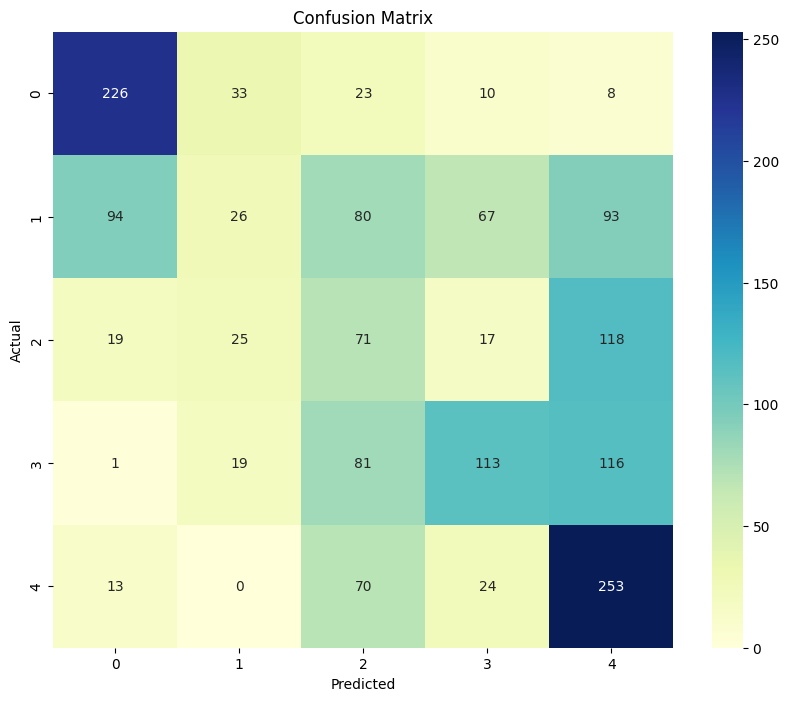

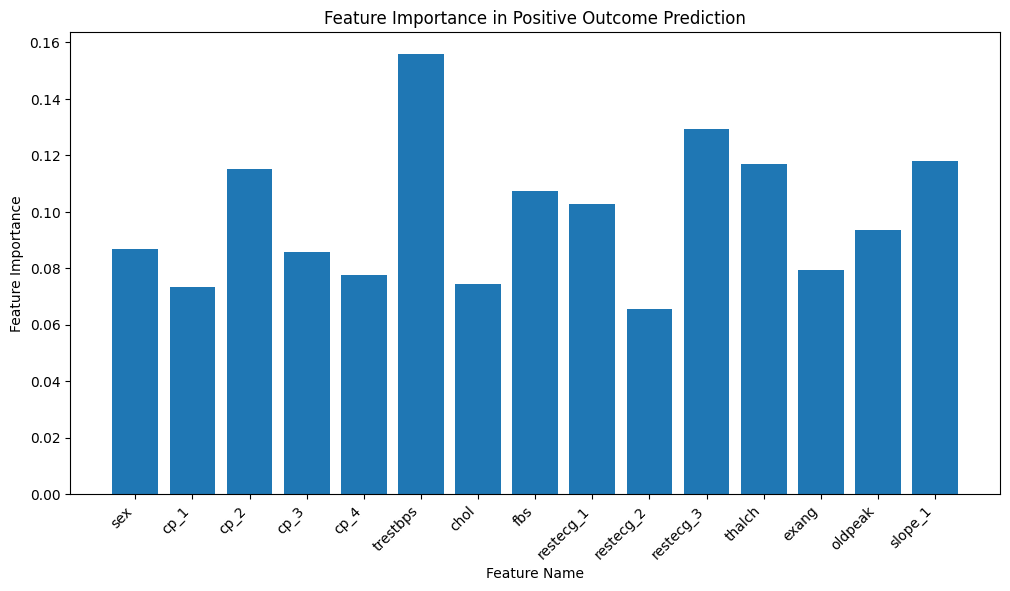

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

learned_weights = model.fc.weight.detach().cpu().numpy()

feature_names = df.columns[1:16]

feature_importance = np.abs(learned_weights).sum(axis=0)

plt.figure(figsize=(12, 6))
feature_importance = feature_importance[:15]
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Positive Outcome Prediction')
plt.show()

50 Epochs

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')


Epoch 10, Loss: 0.94122713804245, Validation Loss: 1.2140562534332275, Validation Accuracy: 0.5375000238418579
Epoch 20, Loss: 0.7599986791610718, Validation Loss: 1.0047059059143066, Validation Accuracy: 0.643750011920929
Epoch 30, Loss: 0.5417772531509399, Validation Loss: 0.803610622882843, Validation Accuracy: 0.7124999761581421
Epoch 40, Loss: 0.3439931869506836, Validation Loss: 0.6944407224655151, Validation Accuracy: 0.762499988079071
Epoch 50, Loss: 0.20381209254264832, Validation Loss: 0.6622869372367859, Validation Accuracy: 0.7875000238418579
Training completed in 11.832864999771118 seconds


Increase number if layers to 3

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 3
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')


Epoch 10, Loss: 1.4065887928009033, Validation Loss: 1.4832240343093872, Validation Accuracy: 0.3812499940395355
Epoch 20, Loss: 1.0438841581344604, Validation Loss: 1.1002349853515625, Validation Accuracy: 0.48124998807907104
Epoch 30, Loss: 0.8096774816513062, Validation Loss: 0.9649544954299927, Validation Accuracy: 0.612500011920929
Epoch 40, Loss: 0.5980274677276611, Validation Loss: 0.8845512270927429, Validation Accuracy: 0.65625
Epoch 50, Loss: 0.392522394657135, Validation Loss: 0.8208707571029663, Validation Accuracy: 0.737500011920929
Training completed in 56.89470720291138 seconds
